# Sistemas Inteligentes

## Laboratório 3 - Redução de Dimensionalidade e Regressão

Algoritmos de Redução de dimensionalidade:
- Principal Component Analysis (PCA)
- Independent Component Analysis (ICA)
- Isometric Mapping (Isomap)
- T-Distributed Stochastic Neighbor Embedding (TSNE)

Modelos de regressão linear:
- Least Squares
- Ridge
- Lasso
- Lasso Least-angle regression (LARS)
- RANdom SAmple Consensus (RANSAC)
- Theil-Sen

### Identificação do Aluno

#### Nome Completo

    Jefferson Paiva de Paula

#### RA

    11201721192

## Importação e preparação dos dados

Importe o dataset de pacientes diabéticos da biblioteca Scikit (load_diabetes) e separe os dados entre atributos (X) e saídas (y).

In [1]:
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
X = load_diabetes().data
y = load_diabetes().target

Mostre os formatos da variável de atributos e da variável de saídas.

In [4]:
X.shape

(442, 10)

In [5]:
y.shape

(442,)

## Redução de Dimensionalidade

Importe e aplique as funções de redução de dimensionalidade (PCA, FastICA, Isomap e TSNE) para reduzir a dimensionalidade a apenas uma feature.

In [6]:
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap

Mostre o formato da nova variável de atributos após a redução de dimensionalidade para cada algoritmo.

In [7]:
#print(len(X[0]))
#pca = PCA(n_components=len(X[0]))
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)

print(X_pca.shape)

(442, 1)


In [8]:
fastica = FastICA(n_components=1)
fastica.fit(X)
X_fastICA = fastica.transform(X)

print(X_fastICA.shape)

(442, 1)


In [9]:
tsne = TSNE(n_components=1)
tsne.fit(X)
X_TSNE = tsne.fit_transform(X)

print(X_TSNE.shape)

(442, 1)


In [10]:
isomap = Isomap(n_components=1)
isomap.fit(X)
X_Isomap = isomap.transform(X)

print(X_Isomap.shape)

(442, 1)


### Caso mais simples

Faça a separação dos dados para treinamento e teste. Reserve 20% dos dados para teste.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2)

Importe o regressor linear e utilize-o para gerar um modelo, então faça uma regressão com os dados de teste.

In [12]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
print(reg.score(X_test, y_test))
reg_pred = reg.predict(X_test)

0.2924240873473073


Importe as funções de erro quadrático médio (MSE) e o coeficiente de determinação (R²), então imprima o MSE e o R².

In [13]:
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(y_test, reg_pred))
print(r2_score(y_test, reg_pred))

4031.3757528006736
0.2924240873473073


Então exiba o gráfico de dispersão dos dados de teste e a curva de regressão gerada.

In [14]:
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test, color = 'blue')
plt.scatter(X_train, y_train, color = 'pink')
plt.plot(X_test, reg_pred)

### Comparando Métodos de Redução de Dimensionalidade

Agora, a fim de comparar com outras técnicas, crie um método iterativo que realize as etapas de separação dos dados entre treinamento e teste, gere um modelo de regressão linear, faça a predição com base nos dados de testes e calcule o erro quadrático médio e o coeficiente de determinação para cada iteração. Então, calcule os valores mínimo, médio, máximo e desvio padrão para cada uma dessas duas métricas. Por fim, plote os histogramas (com 100 bins) das duas métricas. Use 10000 (dez mil) iterações.

#### PCA

In [15]:
mse_PCA = np.zeros(10000)
score_PCA = np.zeros(10000)
for i in range (0, 10000):
    X_train, X_test, y_train , y_test = train_test_split(X_pca, y, test_size = 0.2)
    reg = LinearRegression().fit(X_train, y_train)
    reg_pred = reg.predict(X_test)
    mse_PCA[i] = mean_squared_error(y_test, reg_pred)
    score_PCA[i] = r2_score(y_test, reg_pred)

In [16]:
print("valor minimo",  min(mse_PCA))
print("valor max",  max(mse_PCA))
print("valor devpad",  np.std(mse_PCA))
print("valor minimo",  min(score_PCA))
print("valor max",  max(score_PCA))
print("valor devpad", np.std(score_PCA))

valor minimo 2474.01237322094
valor max 6017.01593947361
valor devpad 482.7635801025532
valor minimo -0.09783592619825043
valor max 0.4875812184741135
valor devpad 0.07069899733990591


C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


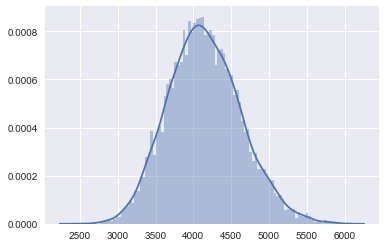

In [17]:
import seaborn as sns
sns.set()
sns.distplot(mse_PCA ,bins = 100)

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


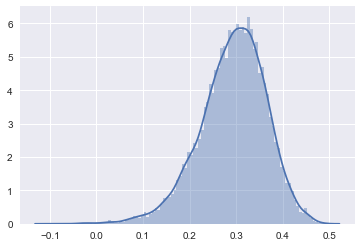

In [18]:
sns.distplot(score_PCA, bins = 100)

#### ICA


In [19]:
mse_ICA=np.zeros(10000)
score_ICA=np.zeros(10000)
for i in range(0, 10000):
    X_train, X_test, y_train, y_test= train_test_split(X_fastICA, y,test_size=0.2)
    reg=LinearRegression().fit(X_train,y_train)
    reg_pred_ICA=reg.predict(X_test)
    y_pred_ICA=reg.predict(X_test)
    mse_ICA[i]=mean_squared_error(y_test, reg_pred_ICA)
    score_ICA[i]=r2_score(y_test, reg_pred_ICA)

In [20]:
    print("valor minimo", min(mse_ICA))
    print("valor max", max(mse_ICA))
    print("valor devpad", np.std(mse_ICA))
    print("valor minimo", min(score_ICA))
    print("valor max", max(score_ICA))
    print("valor devpad", np.std(score_ICA))

valor minimo 2631.762039641777
valor max 6252.3065041380205
valor devpad 473.22415947175307
valor minimo -0.1479324997626832
valor max 0.4917416817740816
valor devpad 0.07177662317722411


C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


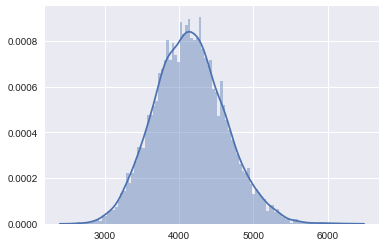

In [21]:
#sns.set()
sns.distplot(mse_ICA, bins=100)

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


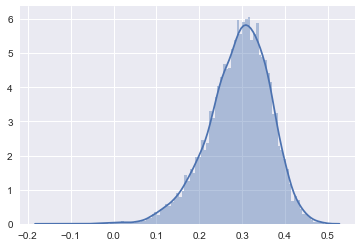

In [22]:
sns.distplot(score_ICA, bins=100)


#### Isomap

In [23]:
mse_Isomap=np.zeros(10000)
score_Isomap=np.zeros(10000)
for i in range(0, 10000):
    X_train, X_test, y_train, y_test= train_test_split(X_Isomap, y,test_size=0.2)
    reg=LinearRegression().fit(X_train,y_train)
    reg_pred_isomap=reg.predict(X_test)
    y_pred_isomap=reg.predict(X_test)
    mse_Isomap[i]=mean_squared_error(y_test, reg_pred_isomap)
    score_Isomap[i]=r2_score(y_test, reg_pred_isomap)

In [24]:
    print("valor minimo", min(mse_Isomap))
    print("valor max", max(mse_Isomap))
    print("valor devpad", np.std(mse_Isomap))
    print("valor minimo", min(score_Isomap))
    print("valor max", max(score_Isomap))
    print("valor devpad", np.std(score_Isomap))

valor minimo 3484.6749642644977
valor max 7913.866027872254
valor devpad 585.104565849608
valor minimo -0.26598035334847947
valor max 0.17173229831452907
valor devpad 0.04776145463676349


C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


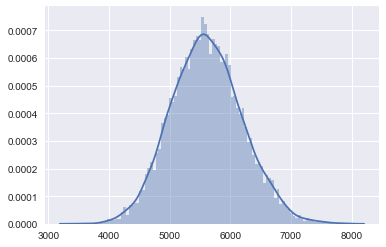

In [25]:
sns.distplot(mse_Isomap, bins=100)

#### TSNE

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


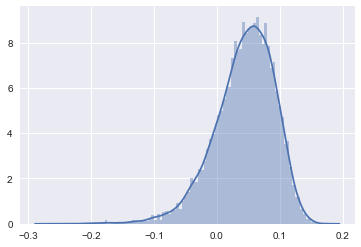

In [26]:
sns.distplot(score_Isomap, bins=100)

### Comparando modelos de Regressão

Exiba o gráfico de dispersão dos dados de teste e a curva de regressão gerada em cada caso.

#### Least Squares

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.20)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg_test_PCA = X_test
reg_pred_PCA = y_pred
LS_test_PCA = X_test
LS_pred_PCA = y_pred

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X_fastICA,y, test_size=0.20)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg_test_ICA = X_test
reg_pred_ICA = y_pred
LS_test_ICA = X_test
LS_pred_ICA = y_pred

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X_Isomap, y, test_size=0.20)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg_test_Isomap = X_test
reg_pred_Isomap = y_pred
LS_test_Isomap = X_test
LS_pred_Isomap = y_pred

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X_TSNE, y, test_size=0.20)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg_test_TSNE = X_test
reg_pred_TSNE = y_pred
LS_test_TSNE = X_test
LS_pred_TSNE = y_pred

PCA


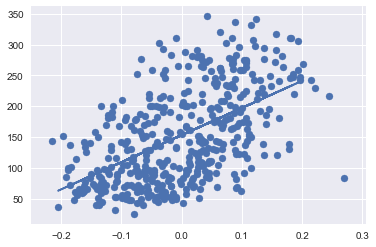

In [31]:
print("PCA")
plt.scatter(X_pca, y)
plt.plot(reg_test_PCA, reg_pred_PCA)

ICA


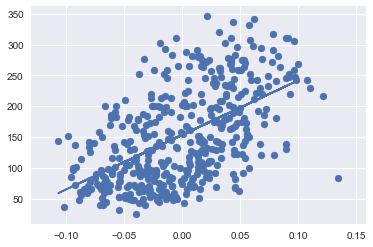

In [32]:
print("ICA")
plt.scatter(X_fastICA, y)
plt.plot(reg_test_ICA, reg_pred_ICA)

ISOMAP


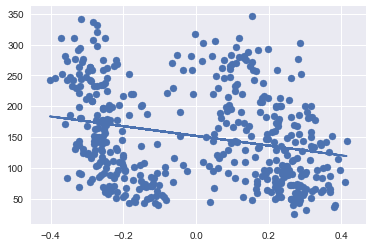

In [33]:
print("ISOMAP")
plt.scatter(X_Isomap, y)
plt.plot(reg_test_Isomap, reg_pred_Isomap)

TSNE


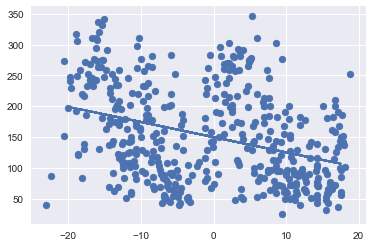

In [34]:
print("TSNE")
plt.scatter(X_TSNE, y)
plt.plot(reg_test_TSNE, reg_pred_TSNE)

#### Ridge

In [35]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.20)
reg = Ridge()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg_test_pca = X_test
reg_pred_pca = y_pred
Ridge_test_pca = X_test
Ridge_pred_pca = y_pred

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_fastICA,y, test_size=0.20)
reg = Ridge()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg_test_ica = X_test
reg_pred_ica = y_pred
Ridge_test_ica = X_test
Ridge_pred_ica = y_pred

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_Isomap, y, test_size=0.20)
reg = Ridge()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg_test_Isomap = X_test
reg_pred_Isomap = y_pred
Ridge_test_Isomap = X_test
Ridge_pred_Isomap = y_pred

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_TSNE, y, test_size=0.20)
reg = Ridge()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg_test_tsne = X_test
reg_pred_tsne = y_pred
Ridge_test_tsne = X_test
Ridge_pred_tsne = y_pred

PCA


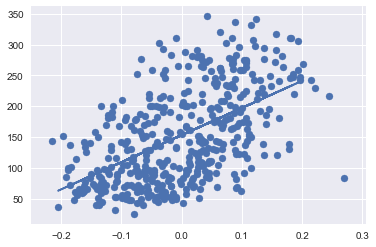

In [41]:
print("PCA")
plt.scatter(X_pca, y)
plt.plot(reg_test_PCA, reg_pred_PCA)

ICA


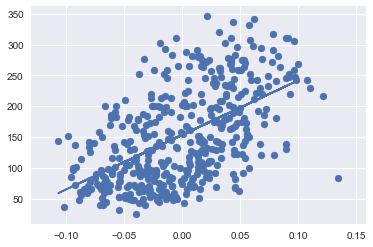

In [42]:
print("ICA")
plt.scatter(X_fastICA, y)
plt.plot(reg_test_ICA, reg_pred_ICA)

ISOMAP


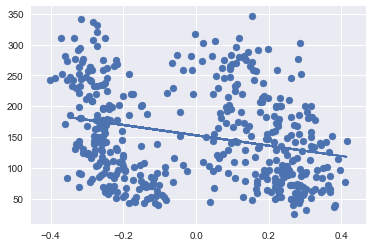

In [43]:
print("ISOMAP")
plt.scatter(X_Isomap, y)
plt.plot(reg_test_Isomap, reg_pred_Isomap)

TSNE


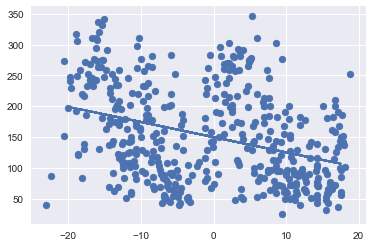

In [44]:
print("TSNE")
plt.scatter(X_TSNE, y)
plt.plot(reg_test_TSNE, reg_pred_TSNE)

#### Lasso

In [46]:
from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.20)
reg = Lasso()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg_test_pca = X_test
reg_pred_pca = y_pred
Lasso_test_pca = X_test
Lasso_pred_pca = y_pred

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_fastICA,y, test_size=0.20)
reg = Lasso()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg_test_ica = X_test
reg_pred_ica = y_pred
Lasso_test_ica = X_test
Lasso_pred_ica = y_pred

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_Isomap, y, test_size=0.20)
reg = Lasso()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg_test_iso = X_test
reg_pred_iso = y_pred
Lasso_test_iso = X_test
Lasso_pred_iso = y_pred

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_TSNE, y, test_size=0.20)
reg = Lasso()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg_test_tsne = X_test
reg_pred_tsne = y_pred
Lasso_test_tsne = X_test
Lasso_pred_tsne = y_pred

PCA


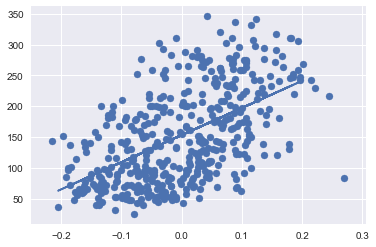

In [51]:
print("PCA")
plt.scatter(X_pca, y)
plt.plot(reg_test_PCA, reg_pred_PCA)

ICA


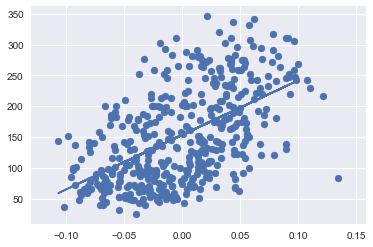

In [52]:
print("ICA")
plt.scatter(X_fastICA, y)
plt.plot(reg_test_ICA, reg_pred_ICA)

ISOMAP


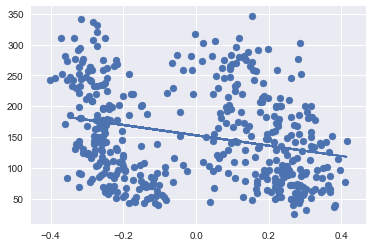

In [53]:
print("ISOMAP")
plt.scatter(X_Isomap, y)
plt.plot(reg_test_Isomap, reg_pred_Isomap)

TSNE


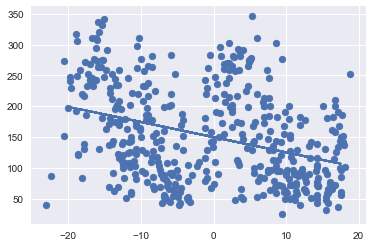

In [54]:
print("TSNE")
plt.scatter(X_TSNE, y)
plt.plot(reg_test_TSNE, reg_pred_TSNE)

#### Lasso LARS

In [56]:
from sklearn.linear_model import LassoLars

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.20)
reg = LassoLars()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg_test_pca = X_test
reg_pred_pca = y_pred
LassoLars_test_pca = X_test
LassoLars_pred_pca = y_pred

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_fastICA,y, test_size=0.20)
reg = LassoLars()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg_test_ica = X_test
reg_pred_ica = y_pred
LassoLars_test_ica = X_test
LassoLars_pred_ica = y_pred

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_Isomap, y, test_size=0.20)
reg = LassoLars()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg_test_iso = X_test
reg_pred_iso = y_pred
LassoLars_test_iso = X_test
LassoLars_pred_iso = y_pred

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_TSNE, y, test_size=0.20)
reg = LassoLars()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg_test_tsne = X_test
reg_pred_tsne = y_pred
LassoLars_test_tsne = X_test
LassoLars_pred_tsne = y_pred

PCA


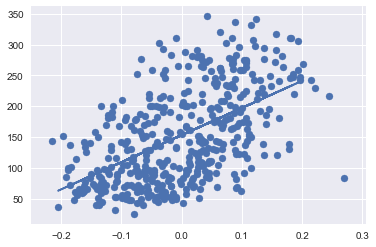

In [65]:
print("PCA")
plt.scatter(X_pca, y)
plt.plot(reg_test_PCA, reg_pred_PCA)

ICA


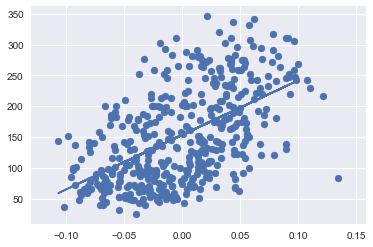

In [66]:
print("ICA")
plt.scatter(X_fastICA, y)
plt.plot(reg_test_ICA, reg_pred_ICA)

ISOMAP


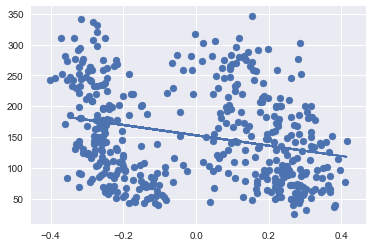

In [67]:
print("ISOMAP")
plt.scatter(X_Isomap, y)
plt.plot(reg_test_Isomap, reg_pred_Isomap)

TSNE


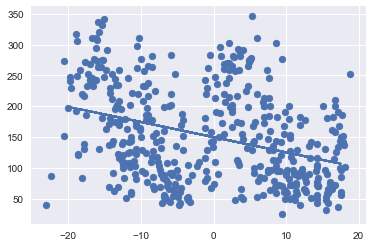

In [68]:
print("TSNE")
plt.scatter(X_TSNE, y)
plt.plot(reg_test_TSNE, reg_pred_TSNE)

#### Bayesian Ridge

In [70]:
from sklearn.linear_model import BayesianRidge
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.20)
reg = BayesianRidge()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg_test_pca = X_test
reg_pred_pca = y_pred
bay_test_pca = X_test
bay_pred_pca = y_pred

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_fastICA, y, test_size=0.20)
reg = BayesianRidge()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg_test_ica = X_test
reg_pred_ica = y_pred
bay_test_ica = X_test
bay_pred_ica = y_pred

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_Isomap, y, test_size=0.20)
reg = BayesianRidge()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg_test_iso = X_test
reg_pred_iso = y_pred
bay_test_iso = X_test
bay_pred_iso = y_pred

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_TSNE, y, test_size=0.20)
reg = BayesianRidge()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg_test_tsne = X_test
reg_pred_tsne = y_pred
bay_test_tsne = X_test
bay_pred_tsne = y_pred

PCA


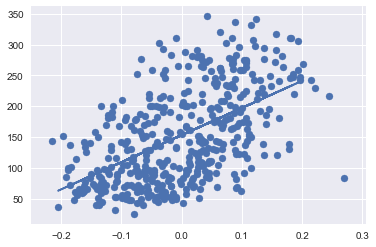

In [74]:
print("PCA")
plt.scatter(X_pca, y)
plt.plot(reg_test_PCA, reg_pred_PCA)

ICA


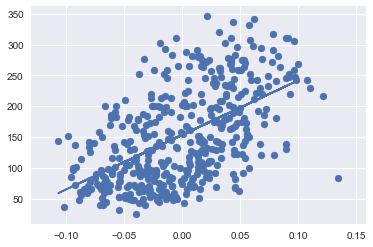

In [75]:
print("ICA")
plt.scatter(X_fastICA, y)
plt.plot(reg_test_ICA, reg_pred_ICA)

ISOMAP


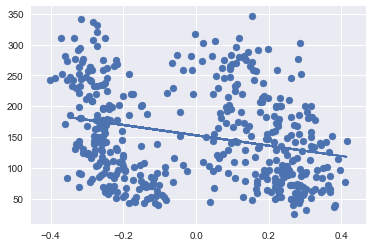

In [76]:
print("ISOMAP")
plt.scatter(X_Isomap, y)
plt.plot(reg_test_Isomap, reg_pred_Isomap)

TSNE


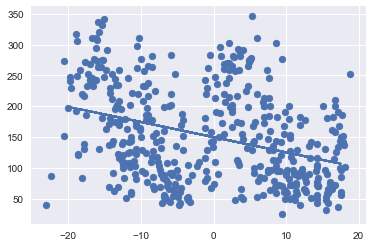

In [77]:
print("TSNE")
plt.scatter(X_TSNE, y)
plt.plot(reg_test_TSNE, reg_pred_TSNE)

#### RANSAC

In [79]:
from sklearn.linear_model import RANSACRegressor
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.20)
reg = RANSACRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg_test_pca = X_test
reg_pred_pca = y_pred
Ransac_test_pca = X_test
Ransac_pred_pca = y_pred

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X_fastICA,y, test_size=0.20)
reg = RANSACRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg_test_ica = X_test
reg_pred_ica = y_pred
Ransac_test_ica = X_test
Ransac_pred_ica = y_pred

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_Isomap, y, test_size=0.20)
reg = RANSACRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg_test_iso = X_test
reg_pred_iso = y_pred
Ransac_test_iso = X_test
Ransac_pred_iso = y_pred

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_TSNE, y, test_size=0.20)
reg = RANSACRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg_test_tsne = X_test
reg_pred_tsne = y_pred
Ransac_test_tsne = X_test
Ransac_pred_tsne= y_pred

PCA


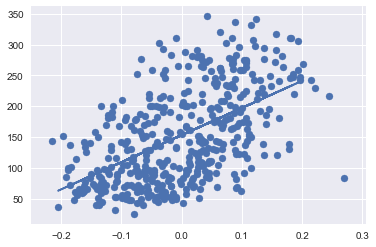

In [84]:
print("PCA")
plt.scatter(X_pca, y)
plt.plot(reg_test_PCA, reg_pred_PCA)

ICA


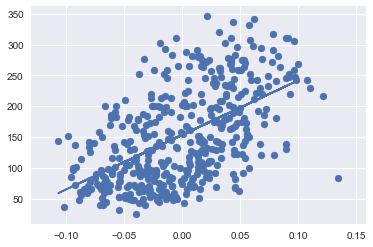

In [85]:
print("ICA")
plt.scatter(X_fastICA, y)
plt.plot(reg_test_ICA, reg_pred_ICA)

ISOMAP


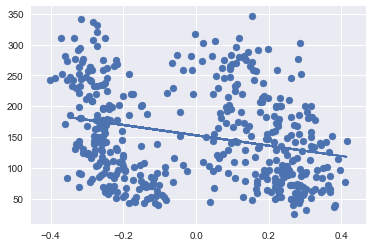

In [86]:
print("ISOMAP")
plt.scatter(X_Isomap, y)
plt.plot(reg_test_Isomap, reg_pred_Isomap)

TSNE


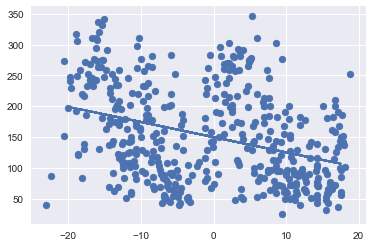

In [87]:
print("TSNE")
plt.scatter(X_TSNE, y)
plt.plot(reg_test_TSNE, reg_pred_TSNE)

#### Theil-Sen

In [88]:
from sklearn.linear_model import TheilSenRegressor
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.20)
reg = TheilSenRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg_test_pca = X_test
reg_pred_pca = y_pred
TS_test_pca = X_test
TS_pred_pca = y_pred

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X_fastICA,y, test_size=0.20)
reg = TheilSenRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg_test_ica = X_test
reg_pred_ica = y_pred
TS_test_ica = X_test
TS_pred_ica = y_pred

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X_Isomap, y, test_size=0.20)
reg = TheilSenRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg_test_iso = X_test
reg_pred_iso = y_pred
TS_test_iso = X_test
TS_pred_iso = y_pred

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X_TSNE, y, test_size=0.20)
reg = TheilSenRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg_test_tsne = X_test
reg_pred_tsne = y_pred
TS_test_tsne = X_test
TS_pred_tsne = y_pred

PCA


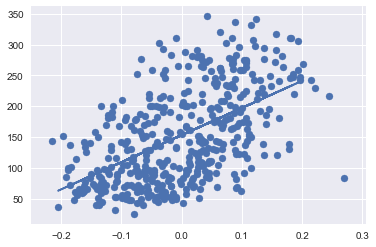

In [96]:
print("PCA")
plt.scatter(X_pca, y)
plt.plot(reg_test_PCA, reg_pred_PCA)

ICA


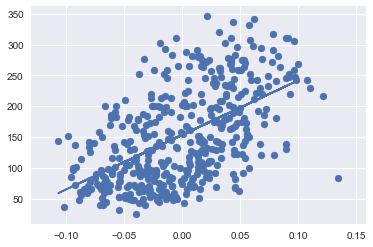

In [97]:
print("ICA")
plt.scatter(X_fastICA, y)
plt.plot(reg_test_ICA, reg_pred_ICA)

ISOMAP


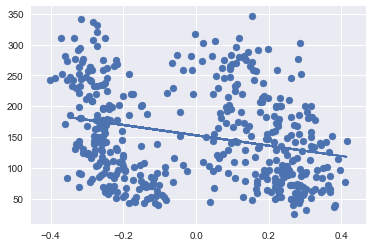

In [98]:
print("ISOMAP")
plt.scatter(X_Isomap, y)
plt.plot(reg_test_Isomap, reg_pred_Isomap)

TSNE


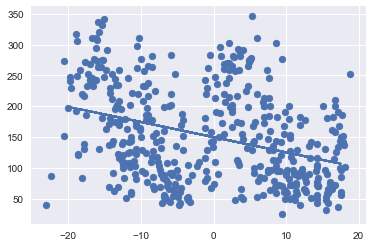

In [99]:
print("TSNE")
plt.scatter(X_TSNE, y)
plt.plot(reg_test_TSNE, reg_pred_TSNE)

### Gráfico geral comparativo

Em uma mesma figura, mostre novamente o gráfico de dispersão dos dados e plote cada um dos modelos gerados utilizando cada técnica deste laboratório. Atente-se a fazer com que o gráfico seja suficientemente autoexplicativo, então utilize diferentes cores, insira uma legenda etc.

PCA


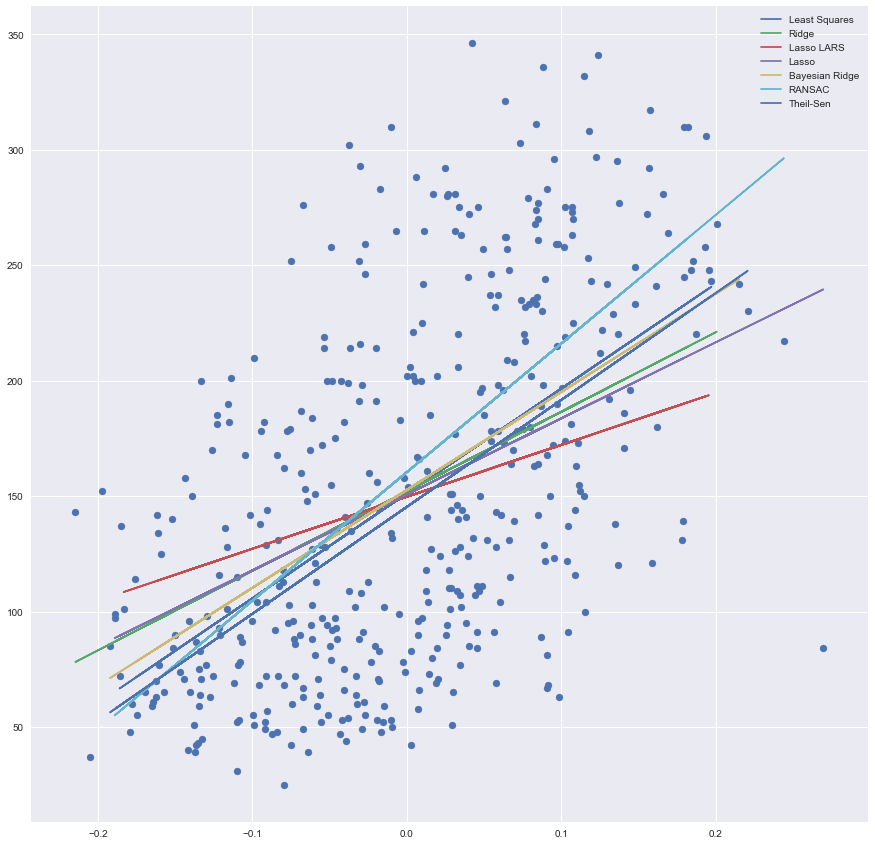

In [109]:
plt.figure(figsize=(15,15))
plt.scatter(X_pca, y)
print("PCA")
plt.plot(LS_test_PCA, LS_pred_PCA, label="Least Squares")
plt.plot(Ridge_test_pca, Ridge_pred_pca, label="Ridge")
plt.plot(LassoLars_test_pca, LassoLars_pred_pca, label="Lasso LARS")
plt.plot(Lasso_test_pca, Lasso_pred_pca, label="Lasso")
plt.plot(bay_test_pca, bay_pred_pca, label="Bayesian Ridge")
plt.plot(Ransac_test_pca, Ransac_pred_pca, label="RANSAC")
plt.plot(TS_test_pca, TS_pred_pca, label="Theil-Sen")
plt.legend()

ICA


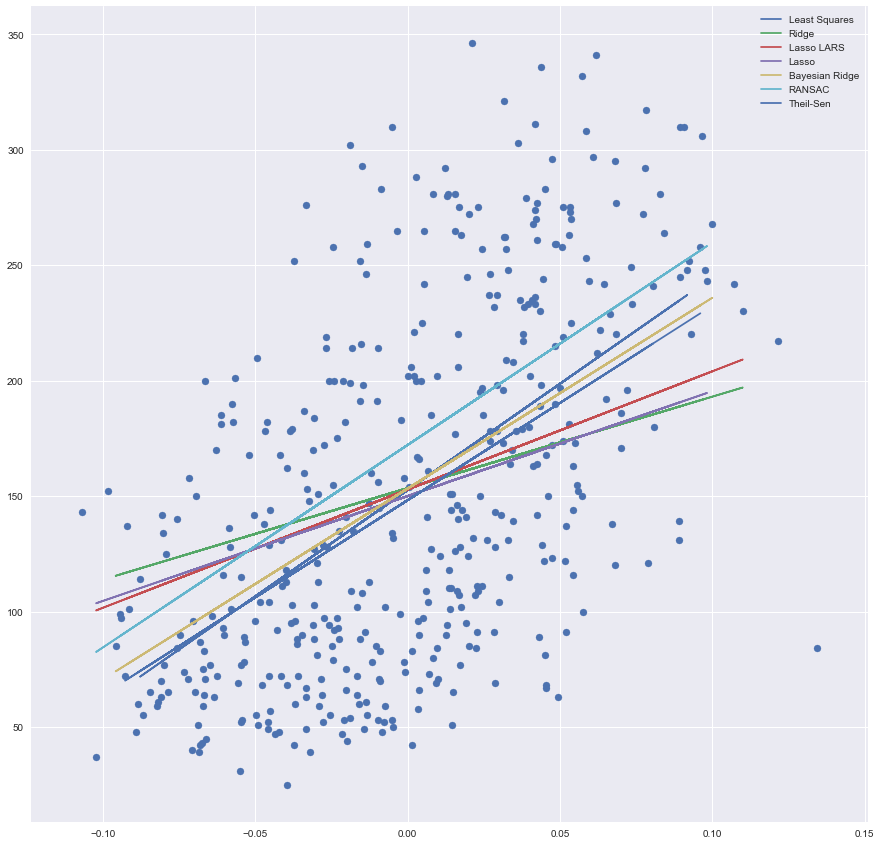

In [117]:
plt.figure(figsize=(15,15))
plt.scatter(X_fastICA, y)
print("ICA")
plt.plot(LS_test_ICA, LS_pred_ICA, label="Least Squares")
plt.plot(Ridge_test_ica, Ridge_pred_ica, label="Ridge")
plt.plot(LassoLars_test_ica, LassoLars_pred_ica, label="Lasso LARS")
plt.plot(Lasso_test_ica, Lasso_pred_ica, label="Lasso")
plt.plot(bay_test_ica, bay_pred_ica, label="Bayesian Ridge")
plt.plot(Ransac_test_ica, Ransac_pred_ica, label="RANSAC")
plt.plot(TS_test_ica, TS_pred_ica, label="Theil-Sen")
plt.legend()

ISOMAP


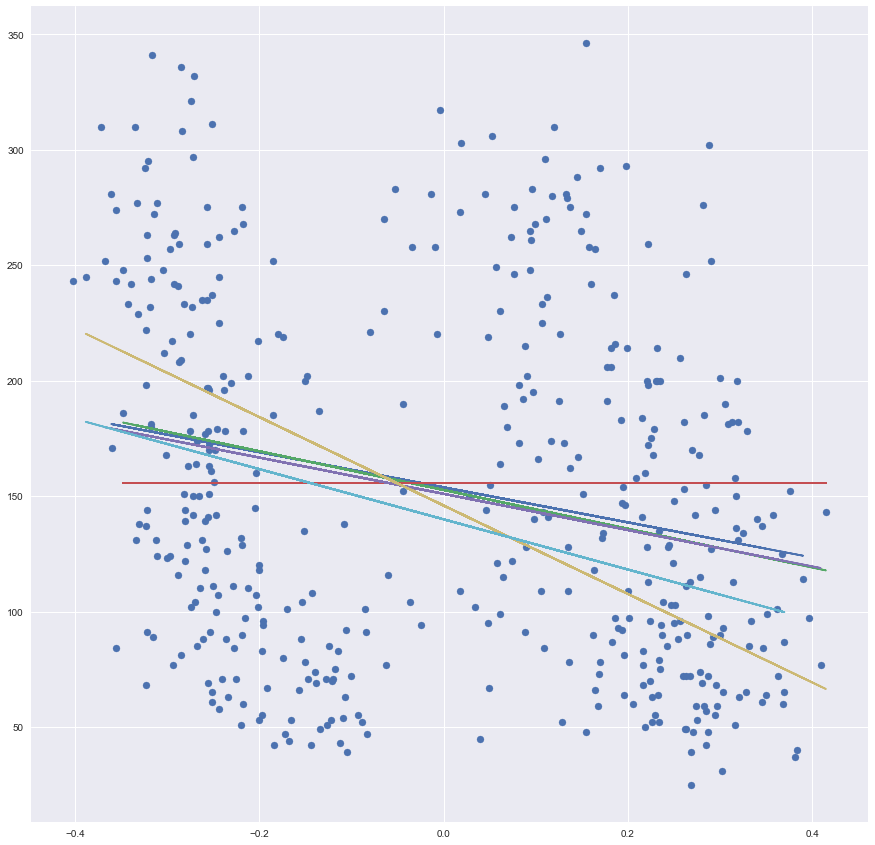

In [118]:
plt.figure(figsize=(15,15))
plt.scatter(X_Isomap, y)
print("ISOMAP")
plt.plot(LS_test_Isomap, LS_pred_Isomap, label="Least Squares")
plt.plot(Ridge_test_Isomap, Ridge_pred_Isomap, label="Ridge")
plt.plot(LassoLars_test_iso, LassoLars_pred_iso, label="Lasso LARS")
#plt.plot(Lasso_test_iso, Lasso_pred_iso, label="Lasso")
plt.plot(bay_test_iso, bay_pred_iso, label="Bayesian Ridge")
plt.plot(Ransac_test_iso, Ransac_pred_iso, label="RANSAC")
plt.plot(TS_test_iso, TS_pred_iso, label="Theil-Sen")

tsne


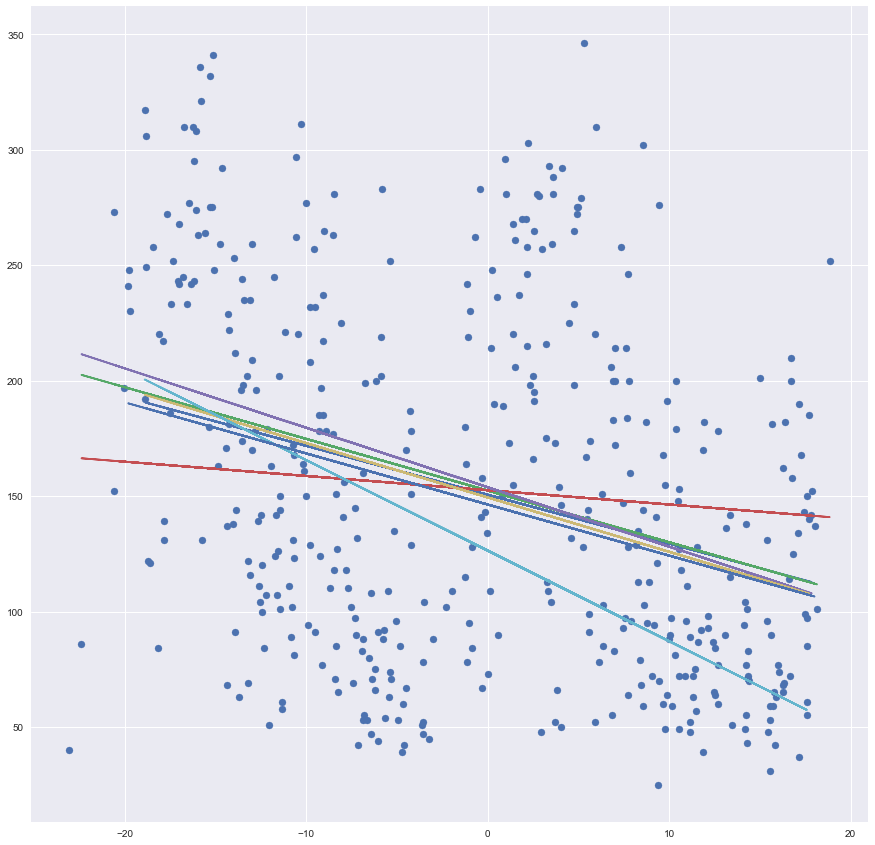

In [122]:
plt.figure(figsize=(15,15))
plt.scatter(X_TSNE, y)
print("tsne")
plt.plot(LS_test_TSNE, LS_pred_TSNE, label="Least Squares")
plt.plot(Ridge_test_tsne, Ridge_pred_tsne, label="Ridge")
plt.plot(LassoLars_test_tsne, LassoLars_pred_tsne, label="Lasso LARS")
plt.plot(Lasso_test_tsne, Lasso_pred_tsne, label="Lasso")
plt.plot(bay_test_tsne, bay_pred_tsne, label="Bayesian Ridge")
plt.plot(Ransac_test_tsne, Ransac_pred_tsne, label="RANSAC")
plt.plot(TS_test_tsne, TS_pred_tsne, label="Theil-Sen")